In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('hotel_bookings_data.csv')
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
df.describe(include=['object'])

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


In [6]:
for i in df.select_dtypes(include='object'):
    print(df[i].value_counts())

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64
Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743

In [7]:
numeric = df.select_dtypes(exclude='object').columns
numeric

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults',
       'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

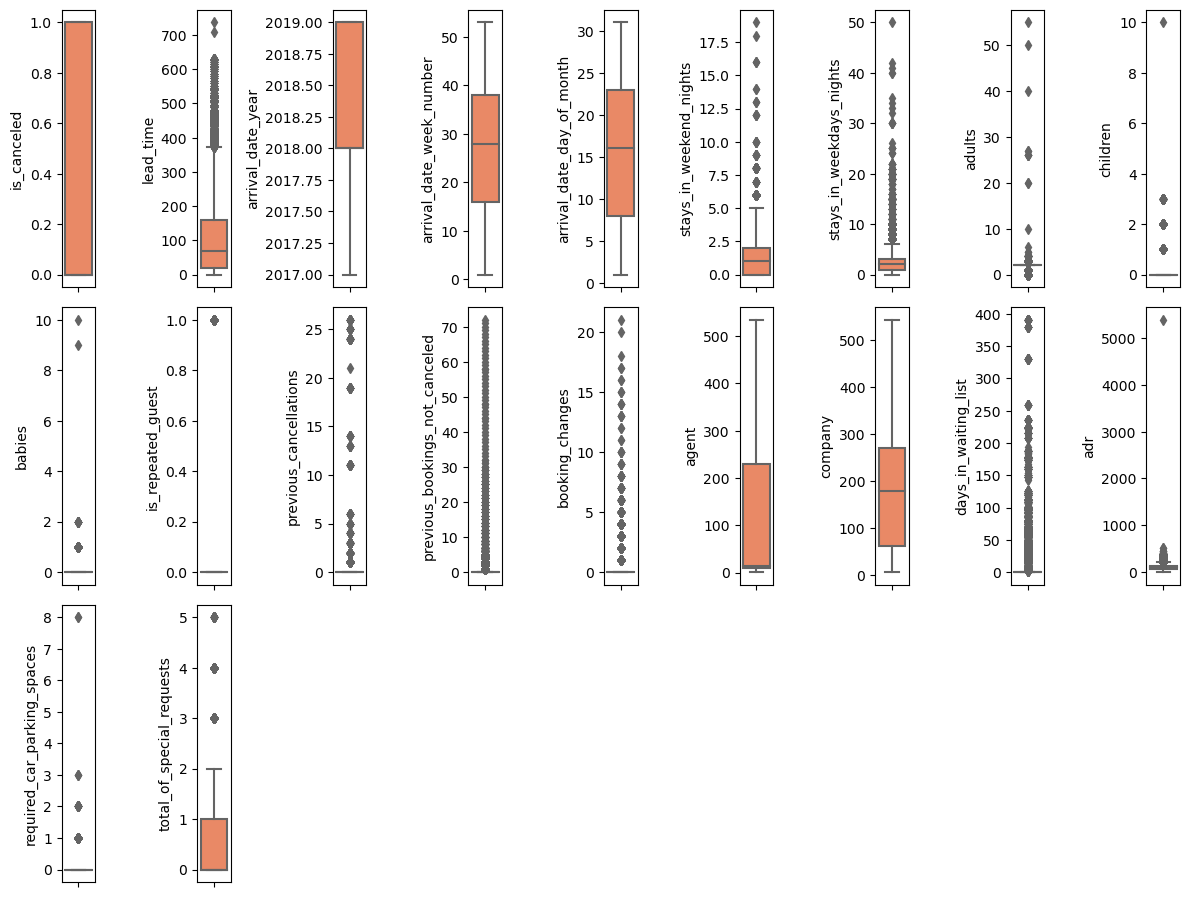

In [8]:

plt.figure(figsize=(12,12))
for i in range(len(numeric)):
    plt.subplot(4,9, i+1)
    sns.boxplot(data=df, y=numeric[i], color='coral')
    plt.tight_layout()

## PREPROCESSING

### Handling Duplicated Data

In [9]:
print("Dimensi Data : ", df.shape)
print("Banyak Duplicated : ", df.duplicated().sum())
#Remove Duplicated
df = df.drop_duplicates()
print("Banyak Duplicated : ", df.duplicated().sum())
print("Dimensi Setelah Remove Duplicated : ", df.shape)

Dimensi Data :  (119390, 29)
Banyak Duplicated :  33261
Banyak Duplicated :  0
Dimensi Setelah Remove Duplicated :  (86129, 29)


### Handling Missing Value

- Penghapusan Variable / Kolom Company dilakukan karena memiliki terlalu banyak data yang hilang, yaitu 94% data hilang.
- Kolom Agent Memiliki ratio missing value 13.6% yang relatif kecil terhadap jumlah keseluruhan data. Namun agar tidak kehilangan informasi dan representative data maka dilakukan metode Imputansi missing value. Pengisian missing value dilakukan dengan Median, karena data memiliki distribusi skewed
- Kolom Children dan City memiliki ratio missing value sangat kecil, sehingga aman untuk dilakukan penghapusan missing value dan tidak akan berpengaruh pada analisis data nantinya.

In [10]:
sum_null = df.isna().sum()
null_ratio = df.isna().sum() / len(df) * 100
df_null = pd.DataFrame(data=sum_null, index=df.columns).reset_index()
df_null.columns = ['column','total_null']
df_null['ratio']  = null_ratio.values
df_null['dtype'] = df.dtypes.values
df_null

,column,total_null,ratio,dtype
0,hotel,0,0.000000,object
1,is_canceled,0,0.000000,int64
2,lead_time,0,0.000000,int64
3,arrival_date_year,0,0.000000,int64
4,arrival_date_month,0,0.000000,object
5,arrival_date_week_number,0,0.000000,int64
6,arrival_date_day_of_month,0,0.000000,int64
7,stays_in_weekend_nights,0,0.000000,int64
8,stays_in_weekdays_nights,0,0.000000,int64
9,adults,0,0.000000,int64


In [11]:
# Drop NaN missing value 'City' & 'children'
df = df.dropna(subset=['city'])
df = df.dropna(subset=['children'])
# Fill NaN 'agent' with median, because skewed distribution
df['agent']=df['agent'].fillna(df['agent'].median)
# Remove delete 'company', because missing values is too high
df = df.drop(['company'], axis=1)

In [12]:
sum_null = df.isna().sum()
null_ratio = df.isna().sum() / len(df) * 100
df_null = pd.DataFrame(data=sum_null, index=df.columns).reset_index()
df_null.columns = ['column','total_null']
df_null['ratio']  = null_ratio.values
df_null['dtype'] = df.dtypes.values
df_null

,column,total_null,ratio,dtype
0,hotel,0,0.0,object
1,is_canceled,0,0.0,int64
2,lead_time,0,0.0,int64
3,arrival_date_year,0,0.0,int64
4,arrival_date_month,0,0.0,object
5,arrival_date_week_number,0,0.0,int64
6,arrival_date_day_of_month,0,0.0,int64
7,stays_in_weekend_nights,0,0.0,int64
8,stays_in_weekdays_nights,0,0.0,int64
9,adults,0,0.0,int64


### Replace values ​​that have the same meaning

In [13]:
print("Value Counts Before Replace\n\n",df['meal'].value_counts())
df['meal'] = df['meal'].replace('Undefined','No Meal')
print("\n\nValue Counts Before Replace\n\n",df['meal'].value_counts())

Value Counts Before Replace

 Breakfast     66674
No Meal        9435
Dinner         8769
Undefined       450
Full Board      347
Name: meal, dtype: int64


Value Counts Before Replace

 Breakfast     66674
No Meal        9885
Dinner         8769
Full Board      347
Name: meal, dtype: int64


In [14]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

## Feature Extraction

Untuk mengetahui jumlah total tamu yang menginap di hotel, maka dapat dilakukan ekstraksi fitur dengan membuat kolom baru Bernama Total Guests yang merupakan penjumlahan dari ketiga kolom Adults + Children + Babies. Diharapkan dengan ekstraksi fitur dapat dilakukan Analisa lebih lanjut mengenai revenue / pendapatan hotel. Dapat dilakukan investigasi lebih lanjut tentang kebutuhan hotel seperti jumlah kamar, kebutuhan makanan, dan lainnya berdasarkan feature Total Guests tersebut.


In [15]:
# total_guests = adults, children, babies
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_guests'] = df['total_guests'].astype('int64')
df = df.drop(columns=['adults','children','babies'])
df.reset_index(inplace=True)

In [16]:
print('before remove unnecassary data : ',df.shape)
print(df[df['total_guests']==0].shape) # terdapat booking yang tidak mempunyai tamu/pengunjung (kemungkinan fiktif). sehingga kita drop

df = df[df['total_guests']>0]

print('after remove unnecassary data : ',df.shape)

before remove unnecassary data :  (85675, 27)
(160, 27)
after remove unnecassary data :  (85515, 27)


In [17]:
df.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests
0,0,Resort Hotel,0,342,2017,September,27,1,0,0,...,3,No Deposit,<bound method NDFrame._add_numeric_operations....,0,Personal,0.0,0,0,Check-Out,2
1,1,Resort Hotel,0,737,2017,September,27,1,0,0,...,4,No Deposit,<bound method NDFrame._add_numeric_operations....,0,Personal,0.0,0,0,Check-Out,2
2,2,Resort Hotel,0,7,2017,September,27,1,0,1,...,0,No Deposit,<bound method NDFrame._add_numeric_operations....,0,Personal,75.0,0,0,Check-Out,1
3,3,Resort Hotel,0,13,2017,September,27,1,0,1,...,0,No Deposit,304.0,0,Personal,75.0,0,0,Check-Out,1
4,4,Resort Hotel,0,14,2017,September,27,1,0,2,...,0,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,2


# Visualization
## Monthly Hotel Booking Analysis Based on Hotel Type
- Perbandingan terhadap data jumlah pemesanan hotel perbulannya berdasarkan tipe hotel, terdapat 2 tipe hotel (city, resort)
- Mengaitkan perbandingan data terhadap kondisi musim

In [18]:
print(df['arrival_date_year'].value_counts())
print(df['arrival_date_month'].value_counts())
print(df['hotel'].value_counts())

2018    41501
2019    31289
2017    12725
Name: arrival_date_year, dtype: int64
October      11110
September     9940
July          8219
June          7767
August        7636
May           7357
December      6655
November      6420
April         5966
February      5015
January       4861
March         4569
Name: arrival_date_month, dtype: int64
City Hotel      52415
Resort Hotel    33100
Name: hotel, dtype: int64


In [19]:
# df_total_booking = df.groupby(['arrival_date_year','arrival_date_month','hotel'])[['index']].count().reset_index()
# df_total_booking['arrival_date_month'] = pd.to_datetime( df_total_booking['arrival_date_month'], format='%B' ).dt.month
# df_total_booking.sort_values(by=['arrival_date_year','arrival_date_month'])

In [20]:
df_total_booking = pd.pivot_table( data=df,index=['arrival_date_month'],columns=['hotel','arrival_date_year'], values='index', aggfunc='count',fill_value=0 )
df_total_booking.reset_index(inplace=True)
df_total_booking.columns = ['arrival_date_month','2017 City Hotel','2018 City Hotel','2019 City Hotel',
                            '2017 Resort Hotel','2018 Resort Hotel','2019 Resort Hotel']
df_total_booking['arrival_date_month'] = pd.to_datetime( df_total_booking['arrival_date_month'], format='%B' ).dt.month
df_total_booking = df_total_booking.sort_values(by='arrival_date_month')

df_total_booking

,arrival_date_month,2017 City Hotel,2018 City Hotel,2019 City Hotel,2017 Resort Hotel,2018 Resort Hotel,2019 Resort Hotel
4,1,760,2113,0,828,1160,0
3,2,998,1969,0,928,1120,0
7,3,0,1013,1679,0,782,1095
0,4,0,1625,1921,0,1102,1318
8,5,0,2351,2447,0,1407,1152
6,6,0,2384,2643,0,1307,1433
5,7,0,2299,3035,0,1391,1494
1,8,0,2222,2697,0,1206,1511
11,9,373,2458,2842,1262,1340,1665
10,10,1050,2782,2652,1332,1589,1705


In [21]:
df_total_booking_2017 = df_total_booking[['arrival_date_month','2017 City Hotel','2017 Resort Hotel']]
df_total_booking_2017 = df_total_booking_2017.melt(id_vars='arrival_date_month',var_name='Hotel',value_name='Total Bookings').sort_values(by='arrival_date_month')
df_total_booking_2017['Hotel'] = df_total_booking_2017['Hotel'].replace('2017 City Hotel','City Hotel')
df_total_booking_2017['Hotel'] = df_total_booking_2017['Hotel'].replace('2017 Resort Hotel','Resort Hotel')

df_total_booking_2018 = df_total_booking[['arrival_date_month','2018 City Hotel','2018 Resort Hotel']]
df_total_booking_2018 = df_total_booking_2018.melt(id_vars='arrival_date_month',var_name='Hotel',value_name='Total Bookings').sort_values(by='arrival_date_month')
df_total_booking_2018['Hotel'] = df_total_booking_2018['Hotel'].replace('2018 City Hotel','City Hotel')
df_total_booking_2018['Hotel'] = df_total_booking_2018['Hotel'].replace('2018 Resort Hotel','Resort Hotel')

df_total_booking_2019 = df_total_booking[['arrival_date_month','2019 City Hotel','2019 Resort Hotel']]
df_total_booking_2019 = df_total_booking_2019.melt(id_vars='arrival_date_month',var_name='Hotel',value_name='Total Bookings').sort_values(by='arrival_date_month')
df_total_booking_2019['Hotel'] = df_total_booking_2019['Hotel'].replace('2019 City Hotel','City Hotel')
df_total_booking_2019['Hotel'] = df_total_booking_2019['Hotel'].replace('2019 Resort Hotel','Resort Hotel')


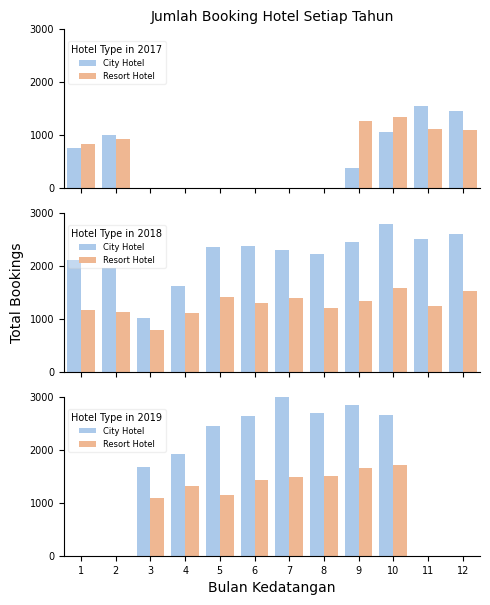

In [22]:
fig, ax = plt.subplots(3,1, figsize = (5,6), sharex=True)
plt.subplot(3, 1, 1)
sns.barplot(data=df_total_booking_2017, x='arrival_date_month', y='Total Bookings', hue='Hotel', palette='pastel')
plt.legend(title='Hotel Type in 2017', bbox_to_anchor=(0,0.95), loc='upper left',framealpha=0.3,fontsize=6,title_fontsize=7)
plt.ylim(0,3000)
plt.xlabel('')
plt.ylabel('')

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.subplot(3, 1, 2)
sns.barplot(data=df_total_booking_2018, x='arrival_date_month', y='Total Bookings', hue='Hotel', palette='pastel')
plt.legend(title='Hotel Type in 2018', bbox_to_anchor=(0, 0.95), loc='upper left',framealpha=0.3, fontsize=6,title_fontsize=7)
plt.ylim(0,3000)
plt.xlabel('')
plt.ylabel('Total Bookings')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.subplot(3, 1, 3)
sns.barplot(data=df_total_booking_2019, x='arrival_date_month', y='Total Bookings', hue='Hotel', palette='pastel')
plt.legend('').set_visible(False)  # Menghilangkan legend
plt.ylim(0,3000)
plt.legend(title='Hotel Type in 2019', bbox_to_anchor=(0, 0.95), loc='upper left',framealpha=0.3,fontsize=6,title_fontsize=7)
plt.xlabel('Bulan Kedatangan')
plt.ylabel('')

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

sns.despine(top=True)
plt.tight_layout()
ax[0].set_title('Jumlah Booking Hotel Setiap Tahun', fontsize=10)
plt.savefig('Jumlah Booking Hotel Setiap Tahun')

### Jumlah Pemesanan Hotel per Bulan (All Time)

In [23]:
df_total_booking_month = df_total_booking[['arrival_date_month']]
df_total_booking_month['Total Booking'] = (df_total_booking['2017 City Hotel']+df_total_booking['2018 City Hotel']+df_total_booking['2019 City Hotel']+
                                           df_total_booking['2017 Resort Hotel']+df_total_booking['2018 Resort Hotel']+df_total_booking['2019 Resort Hotel'])
df_total_booking_month

,arrival_date_month,Total Booking
4,1,4861
3,2,5015
7,3,4569
0,4,5966
8,5,7357
6,6,7767
5,7,8219
1,8,7636
11,9,9940
10,10,11110


Text(3.5, 12000, 'Minimum Total Booking 4569 ')

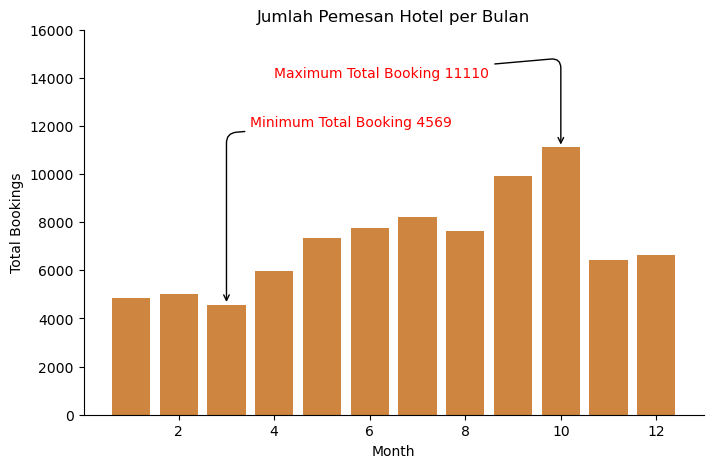

In [24]:
max_total_book = df_total_booking_month['Total Booking'].max()
min_total_book = df_total_booking_month['Total Booking'].min()

plt.figure(figsize=(8,5))
plt.bar(data=df_total_booking_month, x='arrival_date_month', height='Total Booking', color = 'peru')
plt.title('Jumlah Pemesan Hotel per Bulan')
plt.xlabel('Month')
plt.ylim(0,16000)
plt.ylabel('Total Bookings')
sns.despine(top=True, right=True)
plt.annotate(text=f'Maximum Total Booking {max_total_book}', xy=(10,max(df_total_booking_month['Total Booking'])), xytext=(4,14000),
             arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=5,angleB=90,rad=10"),color='red'
             )
plt.annotate(text=f'Minimum Total Booking {min_total_book} ', xy=(3,min(df_total_booking_month['Total Booking'])), xytext=(3.5,12000),
             arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=5,angleB=90,rad=10"),color='red'
             )


### Rata Rata Pemesanan Hotel Setiap Bulan

In [25]:
df.head(2)

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests
0,0,Resort Hotel,0,342,2017,September,27,1,0,0,...,3,No Deposit,<bound method NDFrame._add_numeric_operations....,0,Personal,0.0,0,0,Check-Out,2
1,1,Resort Hotel,0,737,2017,September,27,1,0,0,...,4,No Deposit,<bound method NDFrame._add_numeric_operations....,0,Personal,0.0,0,0,Check-Out,2


In [26]:
df_avg_book = df.groupby(['arrival_date_year','arrival_date_month','hotel'])[['index']].count().reset_index()
df_avg_book.columns = ['arrival_date_year','arrival_date_month','hotel','total_booking']
df_avg_book = df_avg_book.groupby(['arrival_date_month','hotel']).agg({
    'arrival_date_year':'count',
    'total_booking':'sum'
}).sort_values(by='arrival_date_month').reset_index()
df_avg_book.head(4)

,arrival_date_month,hotel,arrival_date_year,total_booking
0,April,City Hotel,2,3546
1,April,Resort Hotel,2,2420
2,August,City Hotel,2,4919
3,August,Resort Hotel,2,2717


In [27]:
df_avg_book['arrival_date_month'] = pd.to_datetime(df_avg_book['arrival_date_month'], format='%B' ).dt.month
df_avg_book['avg_booking_per_month'] = df_avg_book['total_booking'] / df_avg_book['arrival_date_year']
df_avg_book.sort_values('arrival_date_month').reset_index()

,index,arrival_date_month,hotel,arrival_date_year,total_booking,avg_booking_per_month
0,8,1,City Hotel,2,2873,1436.500000
1,9,1,Resort Hotel,2,1988,994.000000
2,6,2,City Hotel,2,2967,1483.500000
3,7,2,Resort Hotel,2,2048,1024.000000
4,15,3,Resort Hotel,2,1877,938.500000
5,14,3,City Hotel,2,2692,1346.000000
6,0,4,City Hotel,2,3546,1773.000000
7,1,4,Resort Hotel,2,2420,1210.000000
8,17,5,Resort Hotel,2,2559,1279.500000
9,16,5,City Hotel,2,4798,2399.000000


Text(0.5, 1.0, 'Rata Rata Pemesanan Hotel Per Bulan')

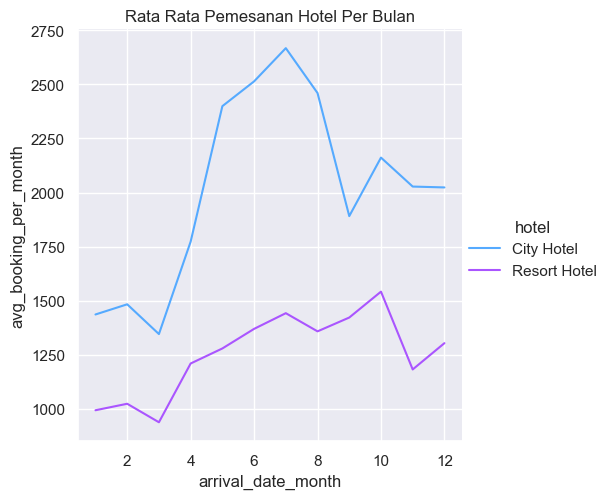

In [28]:
sns.set_theme(style="darkgrid", palette="pastel")
sns.relplot(data=df_avg_book, x='arrival_date_month', y='avg_booking_per_month', hue='hotel', kind='line',palette="cool")
plt.title('Rata Rata Pemesanan Hotel Per Bulan')

### Musim Terhadap Minat Memesan Hotel

In [29]:
musim = np.where((df_total_booking_month['arrival_date_month']>=11) | (df_total_booking_month['arrival_date_month']<=4), 'Hujan','Kemarau' )

Libur = np.where((df_total_booking_month['arrival_date_month']==12),'natal',
                 np.where((df_total_booking_month['arrival_date_month']==6),'lebaran','workday')
                  )

df_total_booking_month['musim'] = musim
df_total_booking_month['Libur_Kerja'] = Libur

df_total_booking_month

,arrival_date_month,Total Booking,musim,Libur_Kerja
4,1,4861,Hujan,workday
3,2,5015,Hujan,workday
7,3,4569,Hujan,workday
0,4,5966,Hujan,workday
8,5,7357,Kemarau,workday
6,6,7767,Kemarau,lebaran
5,7,8219,Kemarau,workday
1,8,7636,Kemarau,workday
11,9,9940,Kemarau,workday
10,10,11110,Kemarau,workday


In [30]:
df_musim = df_total_booking_month.groupby(['musim'])[['Total Booking']].sum()
df_musim = df_musim.reset_index()
df_musim

,musim,Total Booking
0,Hujan,33486
1,Kemarau,52029


In [31]:
df_libur_kerja = df_total_booking_month.groupby('Libur_Kerja')[['Total Booking']].mean()
df_libur_kerja = df_libur_kerja.reset_index()
df_libur_kerja

,Libur_Kerja,Total Booking
0,lebaran,7767.0
1,natal,6655.0
2,workday,7109.3


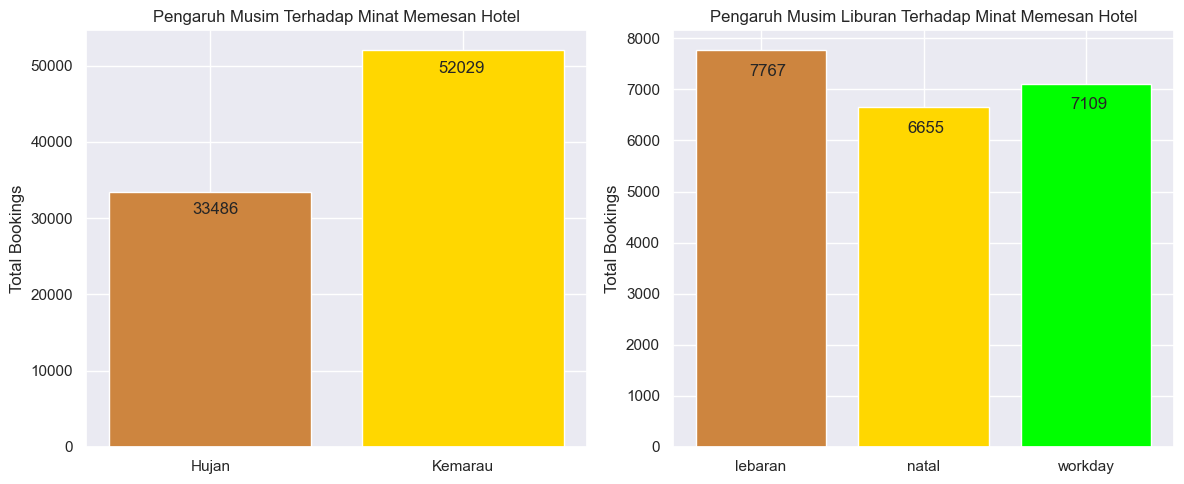

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
max_hujan = df_musim['Total Booking'].max()
min_hujan = df_musim['Total Booking'].min()
plt.bar(data=df_musim, x='musim', height='Total Booking', color=['peru','gold'])
plt.ylabel('Total Bookings')
plt.title('Pengaruh Musim Terhadap Minat Memesan Hotel')

plt.text(x=0.9, y=max_hujan-3000,s=f'{max_hujan}')
plt.text(x=-0.07, y=min_hujan-3000,s=f'{min_hujan}')



plt.subplot(1,2,2)
lebaran = int(df_libur_kerja['Total Booking'][0])
natal = int(df_libur_kerja['Total Booking'][1])
workday = int(df_libur_kerja['Total Booking'][2])
plt.bar(data=df_libur_kerja, x='Libur_Kerja', height='Total Booking', color=['peru','gold','lime'])
plt.ylabel('Total Bookings')
plt.title('Pengaruh Musim Liburan Terhadap Minat Memesan Hotel')
plt.text(x=-0.07, y=lebaran-500,s=f'{lebaran}')
plt.text(x=0.9, y=natal-500,s=f'{natal}')
plt.text(x=1.9, y=workday-500,s=f'{workday}')
plt.tight_layout()

## Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates
1. Buatlah kolom baru yang berisi total durasi menginap. (Hint: Perhatikan kolom-kolom yang memuat informasi tentang durasi menginap)
2. Kelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih signifikan (Hint: Perhatikan persebaran datanya)
3. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)
4. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)
5. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh dari durasi menginap terhadap tingkat pembatalan pemesanan hotel)

In [33]:
print(df.shape)
df['total_nights'] = df['stays_in_weekend_nights']+df['stays_in_weekdays_nights']
df[['stays_in_weekend_nights','stays_in_weekdays_nights','total_nights']].sample(3, random_state=12)

(85515, 27)


,stays_in_weekend_nights,stays_in_weekdays_nights,total_nights
20639,0,4,4
6374,2,5,7
48258,1,2,3


Category (total_stay_nights) :
1. Harian     : 0 - 6 day
2. Minggunan  : 7 - 30 day
3. Bulanan    : >30 day

In [34]:
df['stay_category'] = np.where( (df['total_nights']>=0) & (df['total_nights']<=6), 'Harian', 
                               np.where( (df['total_nights']>= 7 ) & (df['total_nights']<30), 'Mingguan','Bulanan' )
                               )
df[['stays_in_weekend_nights','stays_in_weekdays_nights','total_nights','stay_category']].sample(6)

,stays_in_weekend_nights,stays_in_weekdays_nights,total_nights,stay_category
43038,0,3,3,Harian
68687,0,1,1,Harian
74916,2,5,7,Mingguan
8956,2,2,4,Harian
51000,0,3,3,Harian
31293,2,4,6,Harian


In [35]:
df_stay_analysis = df[['stay_category','hotel','is_canceled']]
print(df_stay_analysis.shape)
df_stay_analysis.reset_index(inplace=True)
df_stay_analysis.sample(10, random_state=2)

(85515, 3)


,index,stay_category,hotel,is_canceled
61218,61280,Harian,City Hotel,0
33857,33871,Harian,City Hotel,1
53263,53304,Harian,City Hotel,0
7883,7888,Mingguan,Resort Hotel,1
77973,78115,Harian,City Hotel,0
73876,73993,Harian,City Hotel,0
53747,53789,Harian,City Hotel,0
745,745,Mingguan,Resort Hotel,1
31676,31686,Harian,Resort Hotel,0
21986,21991,Mingguan,Resort Hotel,0


In [36]:
df_stay_analysis_agg = df_stay_analysis.groupby(['stay_category','hotel','is_canceled'])[['index']].count().reset_index()
df_stay_analysis_agg

,stay_category,hotel,is_canceled,index
0,Bulanan,City Hotel,0,2
1,Bulanan,City Hotel,1,8
2,Bulanan,Resort Hotel,0,14
3,Bulanan,Resort Hotel,1,5
4,Harian,City Hotel,0,34916
5,Harian,City Hotel,1,14509
6,Harian,Resort Hotel,0,18588
7,Harian,Resort Hotel,1,5251
8,Mingguan,City Hotel,0,1662
9,Mingguan,City Hotel,1,1318


In [37]:
df_stay_analysis_agg = pd.pivot_table(df_stay_analysis_agg,index=['stay_category','hotel'] ,columns='is_canceled', values='index').reset_index()
df_stay_analysis_agg.columns = ['num_category','hotel','num_not_canceled','num_canceled']
df_stay_analysis_agg['total_data'] = df_stay_analysis_agg['num_not_canceled'] + df_stay_analysis_agg['num_canceled'] 
df_stay_analysis_agg['ratio_canceled'] = round(df_stay_analysis_agg['num_canceled'] / df_stay_analysis_agg['total_data'] * 100,2)
df_stay_analysis_agg

,num_category,hotel,num_not_canceled,num_canceled,total_data,ratio_canceled
0,Bulanan,City Hotel,2,8,10,80.00
1,Bulanan,Resort Hotel,14,5,19,26.32
2,Harian,City Hotel,34916,14509,49425,29.36
3,Harian,Resort Hotel,18588,5251,23839,22.03
4,Mingguan,City Hotel,1662,1318,2980,44.23
5,Mingguan,Resort Hotel,6645,2597,9242,28.10


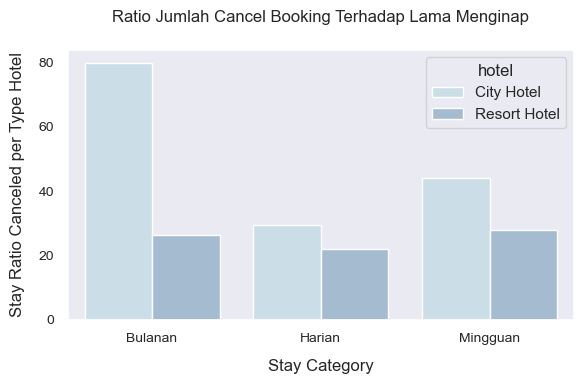

In [38]:
sns.set_theme(style='dark', palette='ch:s=.25,rot=-.25')
plt.figure(figsize=(6,4))
ax = sns.barplot(data=df_stay_analysis_agg, x='num_category', y='ratio_canceled', hue='hotel')


ax.set_xlabel('Stay Category', labelpad=10)
ax.set_ylabel('Stay Ratio Canceled per Type Hotel', labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title('Ratio Jumlah Cancel Booking Terhadap Lama Menginap',pad=20)
plt.tight_layout()

In [39]:
df_stay_analysis_agg1 = df_stay_analysis_agg.groupby(['num_category']).agg({
                            'total_data' : 'sum',
                            'num_canceled' : 'sum'
                        }).reset_index()
df_stay_analysis_agg1['ratio_canceled_per_category'] = round(df_stay_analysis_agg1['num_canceled'] / df_stay_analysis_agg1['total_data']*100,2)
df_stay_analysis_agg1 = df_stay_analysis_agg1.sort_values(by='ratio_canceled_per_category')

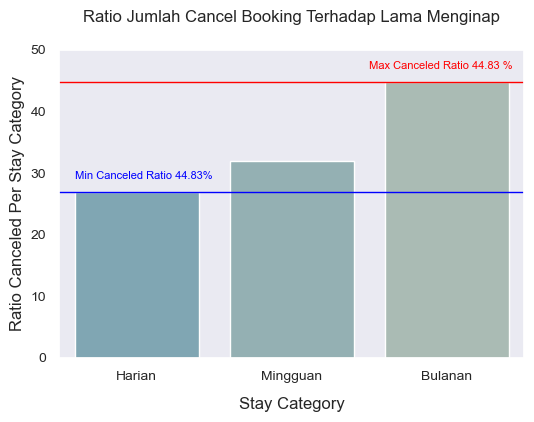

In [40]:
max_ratio = df_stay_analysis_agg1['ratio_canceled_per_category'].max()
min_ratio = df_stay_analysis_agg1['ratio_canceled_per_category'].min()

sns.set_theme(style='dark', palette='blend:#7AB,#EDA')
plt.figure(figsize=(6,4))
ax = sns.barplot(data=df_stay_analysis_agg1, x='num_category', y='ratio_canceled_per_category')

plt.ylabel('Ratio Canceled Per Stay Category')
ax.set_xlabel('Stay Category', labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.ylim(0,50)
plt.title('Ratio Jumlah Cancel Booking Terhadap Lama Menginap', pad=20)
plt.text(x=1.5, y = max_ratio+2, s=f'Max Canceled Ratio {max_ratio} %', fontsize=8,color ='red')
plt.axhline(y=max_ratio, lw=1, color ='red')

plt.text(x=-0.4, y = min_ratio+2, s=f'Min Canceled Ratio {max_ratio}%', fontsize=8,color ='blue')
plt.axhline(y=min_ratio, lw=1, color ='blue')

## Impact Analysis Of Lead Time on Hotel Bookings Cancellation Rate
1. Buatlah kolom baru yang berisi kategorisasi dari kolom jarak waktu pemesanan (Hint: Perhatikan interval dalam membuat kategorisasi)
2. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap jarak waktu pemesanan untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)
3. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap jarak waktu pemesanan untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)
4. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh interval waktu)

In [41]:
df_lead_time = df[['index','hotel','is_canceled','lead_time']]

In [42]:
def lead_time_cat(lead_time):
    if lead_time <=1:
        result = 'Mendesak'
    elif lead_time >= 2 and lead_time <= 6:
        result = 'Harian'
    elif lead_time >= 7 and lead_time <=30 :
        result = 'Mingguan'
    elif lead_time >= 31 and lead_time <=182 :
        result = 'Bulanan'
    elif lead_time >= 183 and lead_time <=365 :
        result = 'Setengah Tahunan'  
    elif lead_time >= 366  :
        result = 'Tahunan' 
    return result

cat = df_lead_time['lead_time'].apply( lambda x : lead_time_cat(x) )
df_lead_time['lead_time_category'] = cat
df_lead_time.sample(5, random_state=12)

,index,hotel,is_canceled,lead_time,lead_time_category
20639,26136,Resort Hotel,0,115,Bulanan
6374,8542,Resort Hotel,1,198,Setengah Tahunan
48258,68651,City Hotel,1,101,Bulanan
59344,87456,City Hotel,0,5,Harian
16504,21558,Resort Hotel,0,0,Mendesak


In [43]:
df_lead_time_agg = df_lead_time[df_lead_time['is_canceled']==1].groupby(['hotel','lead_time_category'])[['index']].count().reset_index()
df_lead_time_agg.columns=['hotel','lead_time_category','total_canceled']
df_lead_time_agg

,hotel,lead_time_category,total_canceled
0,City Hotel,Bulanan,9203
1,City Hotel,Harian,567
2,City Hotel,Mendesak,346
3,City Hotel,Mingguan,3020
4,City Hotel,Setengah Tahunan,2512
5,City Hotel,Tahunan,187
6,Resort Hotel,Bulanan,4377
7,Resort Hotel,Harian,245
8,Resort Hotel,Mendesak,198
9,Resort Hotel,Mingguan,1236


In [44]:
df_lead_time_total =  df_lead_time.groupby(['hotel','lead_time_category'])[['index']].count().reset_index()
df_lead_time_total.columns=['hotel','lead_time_category','total_data']
df_lead_time_total

,hotel,lead_time_category,total_data
0,City Hotel,Bulanan,26395
1,City Hotel,Harian,4548
2,City Hotel,Mendesak,4479
3,City Hotel,Mingguan,11109
4,City Hotel,Setengah Tahunan,5530
5,City Hotel,Tahunan,354
6,Resort Hotel,Bulanan,14139
7,Resort Hotel,Harian,3193
8,Resort Hotel,Mendesak,4384
9,Resort Hotel,Mingguan,6157


In [45]:
df_lead_time_ratio = df_lead_time_agg.merge(df_lead_time_total, how='inner', left_on=['hotel','lead_time_category'], right_on=['hotel','lead_time_category'])
df_lead_time_ratio['ratio_canceled'] = round(df_lead_time_ratio['total_canceled'] / df_lead_time_ratio['total_data'] * 100,2)
df_lead_time_ratio=df_lead_time_ratio.sort_values(by='ratio_canceled')

Text(0.5, 1.0, 'Korelasi Jarak Waktu Pemesanan Terhadap Jumlah Cancellation Booking')

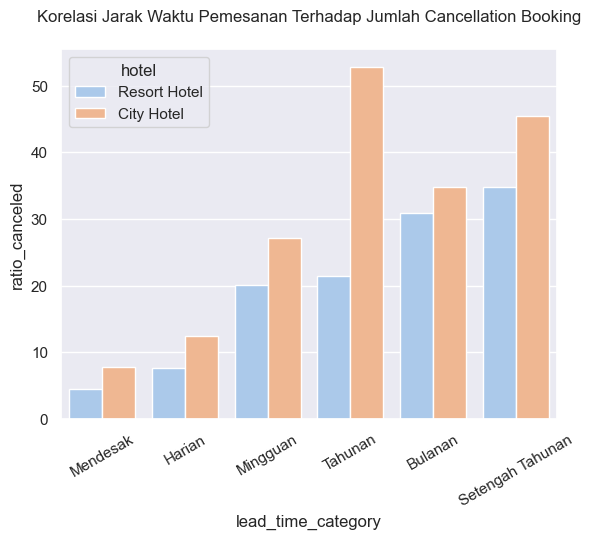

In [46]:
sns.set_theme(palette='pastel')
sns.barplot(data=df_lead_time_ratio, x='lead_time_category', y='ratio_canceled', hue='hotel')
plt.xticks(rotation = 30)
plt.title('Korelasi Jarak Waktu Pemesanan Terhadap Jumlah Cancellation Booking', pad=20)